In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
print("Number of Instances and Attributes:", df.shape)
print('\n')
print('Dataset columns:',df.columns)
print('\n')
print('Data types of each columns: ', df.info())

Number of Instances and Attributes: (2200, 8)


Dataset columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Data types of each columns:  None


In [4]:
count_dups = df.duplicated().sum()
print("Number of Duplicates: ", count_dups)
if count_dups >= 1:
    df.drop_duplicates(inplace=True)
    print('Duplicate values removed!')
else:
    print('No Duplicate values')

Number of Duplicates:  0
No Duplicate values


In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
X = df.drop("label", axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [7]:
print("Training Set Size: ",str(len(X_train)))
print("Test Set Size: ",str(len(X_test)))

Training Set Size:  1760
Test Set Size:  440


In [8]:
Models = []
Models.append(('Logistic Regression'   , LogisticRegression()))
Models.append(('Linera Discriminant Analysis'  , LinearDiscriminantAnalysis()))
Models.append(('K-Nearest Neighbour'  , KNeighborsClassifier()))
Models.append(('Decision Tree Classifier' , DecisionTreeClassifier()))
Models.append(('Naive Bayers'   , GaussianNB()))
Models.append(('Support Vector Machine'  , SVC(probability=True)))

num_folds = 10
scoring = 'accuracy'

results = []
names = []
for name, model in Models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.955114 (0.016749)
Linera Discriminant Analysis: 0.965909 (0.013203)
K-Nearest Neighbour: 0.979545 (0.005207)
Decision Tree Classifier: 0.982955 (0.011364)
Naive Bayers: 0.993750 (0.004720)
Support Vector Machine: 0.976705 (0.008214)


In [9]:
def classification_metrics(model, conf_matrix):
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

In [10]:
pipeline = make_pipeline(StandardScaler(),  GaussianNB())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

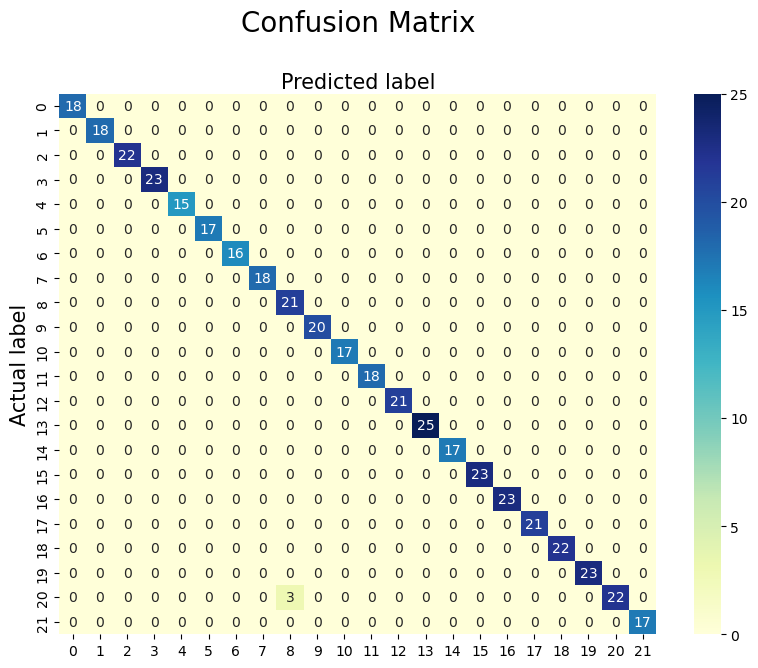

In [11]:
conf_matrix = confusion_matrix(y_test,y_pred)
classification_metrics(pipeline, conf_matrix)

In [12]:
print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")

Training Accuracy Score: 99.5%
Validation Accuracy Score: 99.3%
